## Viscolelastic Data Generation

First we Choose the model and other parameters for our data, and save this data for reference later:

In [1]:
import numpy as np
import sympy as sym
import sys

sys.path.append('../')
import data.Generation.VE_DataGen_Functions as vedg

In [98]:
Input_Type = 'Strain'
E = [1, 11]
Eta = [20]
t = sym.symbols('t', real=True)
Input_Function = sym.sinc(t)
Input_Description = 'Sinc'
Int_Type = 'Numerical'

In [99]:
Tuple_of_Expressions = vedg.Stress_Strain_Master_Int(Input_Type, E, Eta, Input_Function, Int_Type, t)
Tuple_of_Expressions

(1.0 + 11.0*exp(-11*t/20),
 <function data.Generation.VE_DataGen_Functions.Stress_Strain_Master_Int.<locals>.<lambda>(t)>)

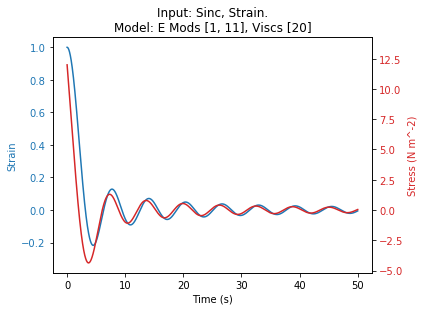

In [100]:
time = np.linspace(0.001, 50, 5000)

title = ('Input: ' + Input_Description + ', ' + Input_Type + 
         '.\nModel: E Mods ' + str(E) + ', Viscs ' + str(Eta))

Strain_Array, Stress_Array = vedg.Eval_Graph_Strain_Stress(title, time, Input_Function, Tuple_of_Expressions, Input_Type, Int_Type, t)

In [101]:
vedg.save_stress_strain(time, Strain_Array, Stress_Array, '../data/StressStrain', Input_Type, Input_Description, E, Eta)